In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch NVIDIA stock data
nvda = yf.download('NVDA', start='2020-01-01', end='2025-01-01')

# Display the first 5 rows
print(nvda.head())

# Check for missing values
print(nvda.isnull().sum())


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA
Date                                                         
2020-01-02  5.972711  5.972711  5.893294  5.943832  237536000
2020-01-03  5.877111  5.920927  5.828066  5.852962  205384000
2020-01-06  5.901759  5.906987  5.757614  5.783754  262636000
2020-01-07  5.973209  6.019017  5.885079  5.930140  314856000
2020-01-08  5.984413  6.025740  5.928896  5.968977  277108000
Price   Ticker
Close   NVDA      0
High    NVDA      0
Low     NVDA      0
Open    NVDA      0
Volume  NVDA      0
dtype: int64


In [16]:
# Summary statistics
print(nvda.describe())


Price         Close         High          Low         Open        Volume
Ticker         NVDA         NVDA         NVDA         NVDA          NVDA
count   1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03
mean      38.445948    39.156301    37.671665    38.450352  4.468056e+08
std       38.233881    38.944453    37.489330    38.295294  1.877132e+08
min        4.892426     5.229714     4.500833     4.984595  9.788400e+07
25%       13.573233    13.824406    13.338220    13.605264  3.084230e+08
50%       21.237931    21.744668    20.824598    21.172298  4.209180e+08
75%       45.626478    46.206088    44.970619    45.750924  5.467242e+08
max      148.869751   152.879470   146.249911   149.339720  1.543911e+09


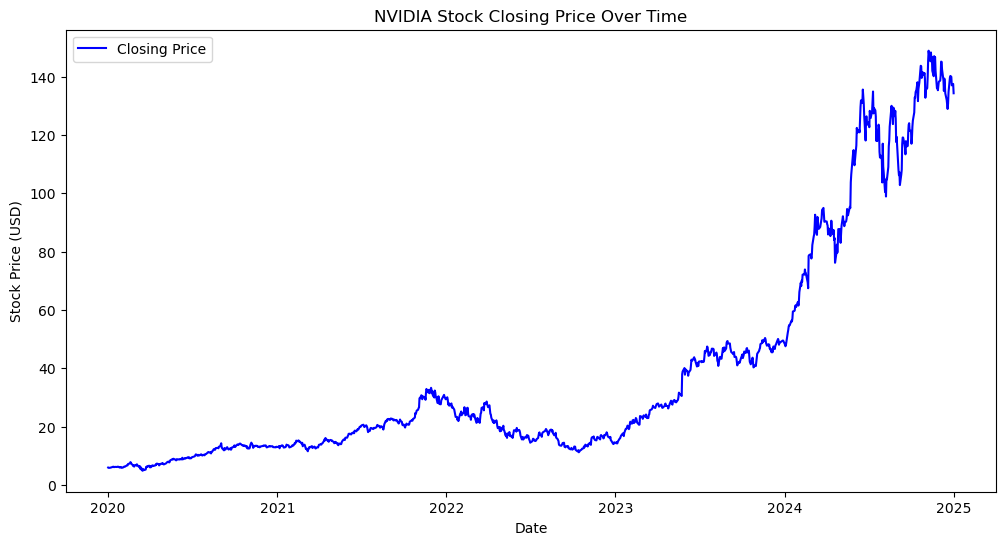

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(nvda['Close'], label='Closing Price', color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("NVIDIA Stock Closing Price Over Time")
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

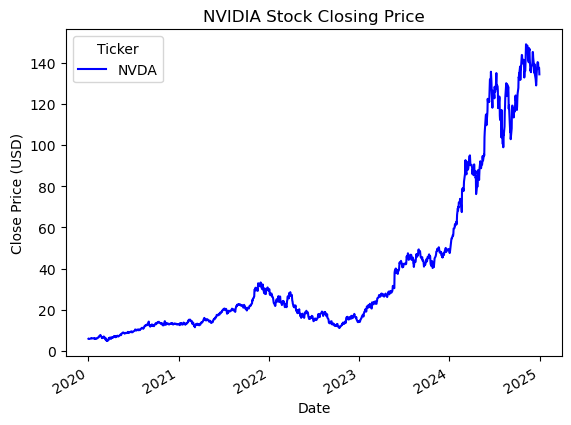

In [20]:
plt.figure(figsize=(12, 6))
nvda['Close'].plot(title="NVIDIA Stock Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.show()


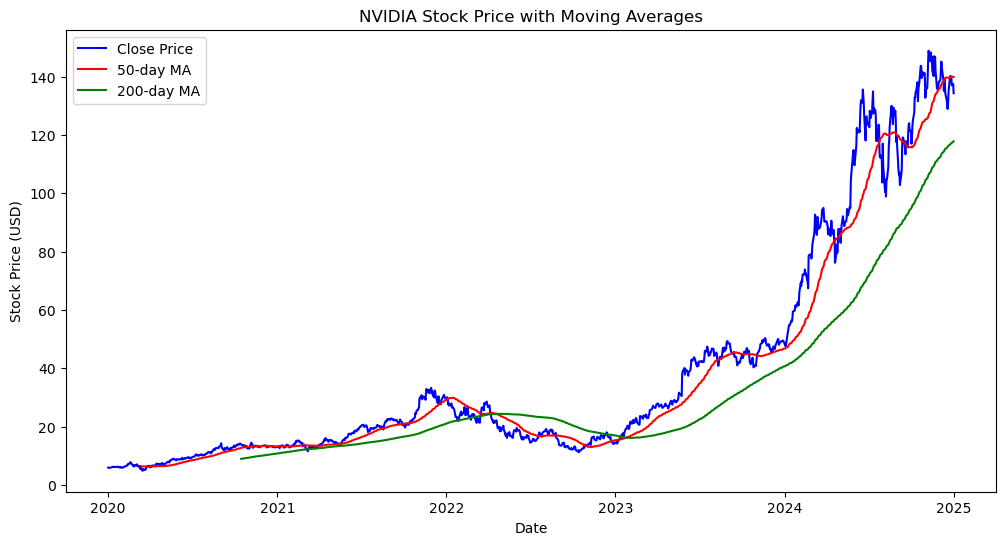

In [22]:
nvda['MA50'] = nvda['Close'].rolling(window=50).mean()
nvda['MA200'] = nvda['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(nvda['Close'], label='Close Price', color='blue')
plt.plot(nvda['MA50'], label='50-day MA', color='red')
plt.plot(nvda['MA200'], label='200-day MA', color='green')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("NVIDIA Stock Price with Moving Averages")
plt.legend()
plt.show()


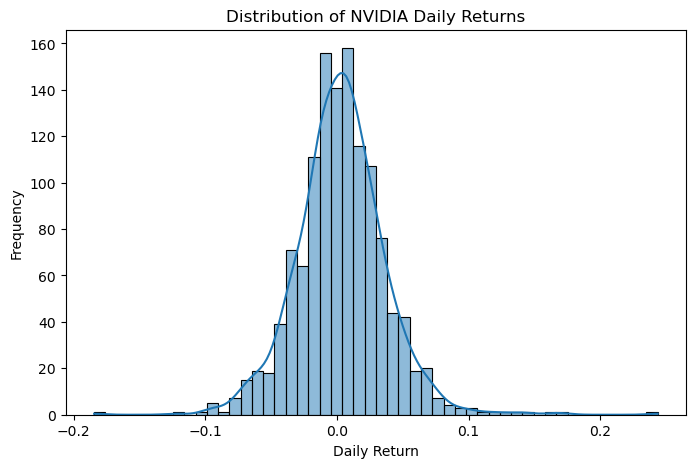

In [24]:
nvda['Daily Return'] = nvda['Close'].pct_change()

plt.figure(figsize=(8, 5))
sns.histplot(nvda['Daily Return'].dropna(), bins=50, kde=True)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Distribution of NVIDIA Daily Returns")
plt.show()


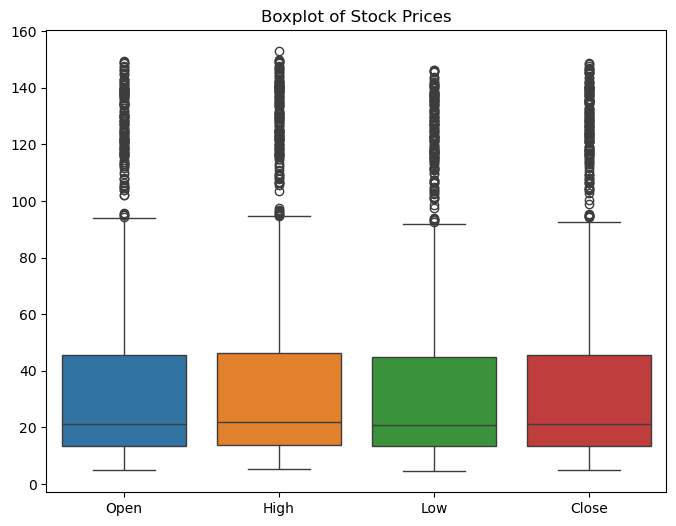

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=nvda[['Open', 'High', 'Low', 'Close']])
plt.title("Boxplot of Stock Prices")
plt.show()


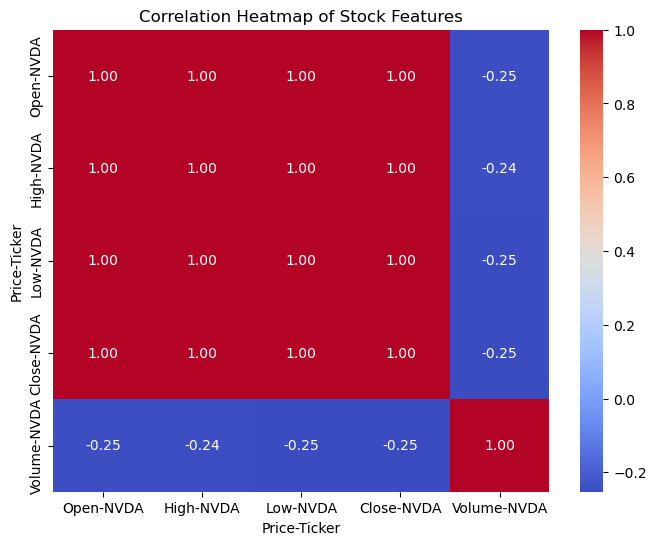

In [28]:
# Compute correlation matrix
corr_matrix = nvda[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Stock Features")
plt.show()
